In [162]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import find_peaks_cwt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
from matplotlib import gridspec
from uncertainties import ufloat
from uncertainties.umath import * 
from uncertainties import unumpy as unp


In [163]:
air = pd.read_excel('../data/air_data_clement.xlsx')
argon = pd.read_excel('../data/argon_data_clement.xlsx')
co2 = pd.read_excel('../data/co2_data_clement.xlsx')
nitro = pd.read_excel('../data/nitrogen_data_clement.xlsx')

In [164]:
air

,Internal Pressure P1 (kPa),Time (s),Internal Pressure P0 (kPa),Ambient Pressure (kPa),Differential Pressure,Calc1 (units),gamma
0,102.82,843.6,115.22,102.25,12.97,115.22,1.048822
1,103.35,933.8,117.98,102.22,15.75,117.98,1.083040
2,102.05,1031.8,111.95,102.23,9.72,111.95,0.980967
3,102.81,1142.3,115.78,102.24,13.54,115.78,1.046795
4,102.50,1223.5,114.64,102.23,12.41,114.64,1.023564
5,102.35,1369.0,112.68,102.21,10.47,112.68,1.014235
6,100.88,1464.9,106.50,102.22,4.28,106.50,0.756597
7,101.13,1530.6,107.90,102.24,5.66,107.90,0.831535
8,101.07,1601.2,107.96,102.23,5.74,107.96,0.826956
9,101.95,1674.0,111.62,102.22,9.40,111.62,0.970813


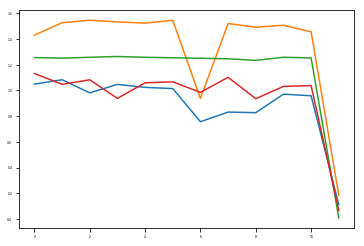

In [165]:
air['gamma'].plot()
argon['gamma'].plot()
co2['gamma'].plot()
nitro['gamma'].plot()
plt.show()

In [166]:

A = air.values[0:10]
B = argon.values[0:10]
C = co2.values[0:10]
D = nitro.values[0:10]

In [167]:
y1 = np.log(A[:,2]/A[:,3])
x1 = np.log(A[:,2]/A[:,0])
y2 = np.log(B[:,2]/B[:,3])
x2 = np.log(B[:,2]/B[:,0])
y3 = np.log(C[:,2]/C[:,3])
x3 = np.log(C[:,2]/C[:,0])
y4 = np.log(D[:,2]/D[:,3])
x4 = np.log(D[:,2]/D[:,0])

In [168]:
def lin(x,A):
    return A*x
def lin2(x,A,k):
    return A*x+k

In [169]:
popt1, pcov1 = curve_fit(lin, x1, y1)
popt2, pcov2 = curve_fit(lin, x2, y2)
popt3, pcov3 = curve_fit(lin, x3, y3)
popt4, pcov4 = curve_fit(lin, x4, y4)

m = np.array([popt1,popt2,popt3,popt4])
b = np.array([pcov1,pcov2,pcov3,pcov4])
err = np.sqrt(b)
err = np.reshape(b,4)
m = np.reshape(m,4)
err2 =0.005

In [170]:
res1 = y1 -lin(x1,m[0])
res2 = y2 -lin(x2,m[1])
res3 = y3 -lin(x3,m[2])
res4 = y4 -lin(x4,m[3])
err = np.array([np.std(res1),np.std(res2),np.std(res3),np.std(res4)])
m

array([1.00631503, 1.51139884, 1.25551224, 1.0630476 ])

In [171]:
P_0 = np.array([ufloat(x,1) for x in D[:,2]])
H = np.array([ufloat(x,1) for x in D[:,3]])
P_1 = np.array([ufloat(x,1) for x in D[:,0]])
gamma1 = np.array([log(x/y) for [x,y] in zip(P_0,H)])
gamma2 = np.array([log(x/y) for [x,y] in zip(P_0,P_1)])
gamma = np.array([x/y for [x,y] in zip(gamma1,gamma2)])
err = unp.std_devs(gamma)
err = np.mean(err)
err

0.1386030612425124

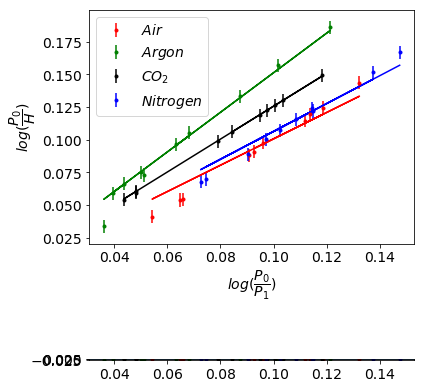

In [192]:
plt.rcParams.update({'font.size':14})
fig = plt.figure(1)
gridspec.GridSpec(4,4)

plt.subplot2grid((4,4), (0,0), colspan=4, rowspan=3)
plt.errorbar(x1,y1,err2,fmt= 'r.', label = '$Air$')
plt.errorbar(x2,y2,err2, fmt= 'g.', label = '$Argon$')
plt.errorbar(x3,y3,err2, fmt= 'k.', label = '$CO_2$')
plt.errorbar(x4,y4,err2,  fmt= 'b.', label = '$Nitrogen$')

plt.plot(x1,lin(x1,popt1), 'r-')
plt.plot(x2,lin(x2,popt2), 'g-')
plt.plot(x3,lin(x3,popt3), 'k-')
plt.plot(x4,lin(x4,popt4), 'b-')

plt.ylabel('$log(\dfrac{P_0}{H})$')
plt.xlabel('$log(\dfrac{P_0}{P_1})$')
plt.legend()

plt.subplot2grid((4,4), (3,0),colspan=4, rowspan=1)

plt.errorbar(x1,res1,err2,fmt= 'r.', label = '$Air$')
plt.errorbar(x2,res2,err2, fmt= 'g.', label = '$Argon$')
plt.errorbar(x3,res3,err2, fmt= 'k.', label = '$CO_2$')
plt.errorbar(x4,res4,err2,  fmt= 'b.', label = '$Nitrogen$')
plt.axhline(y=0)

fig.tight_layout()
fig.set_size_inches(w=6,h=6)

In [193]:
popt1, pcov1 = curve_fit(lin2, x1, y1)
popt2, pcov2 = curve_fit(lin2, x2, y2)
popt3, pcov3 = curve_fit(lin2, x3, y3)
popt4, pcov4 = curve_fit(lin2, x4, y4)

m = np.array([popt1[0],popt2[0],popt3[0],popt4[0]])
b = np.array([popt1[1],popt2[1],popt3[1],popt4[1]])
b = np.reshape(b,4)
m = np.reshape(m,4)
b

array([-0.03092808, -0.01047025, -0.00119574, -0.02816492])

In [194]:
res1 = y1 -lin2(x1,m[0],b[0])
res2 = y2 -lin2(x2,m[1],b[1])
res3 = y3 -lin2(x3,m[2],b[2])
res4 = y4 -lin2(x4,m[3],b[3])
err = np.array([np.std(res1),np.std(res2),np.std(res3),np.std(res4)])
err2 =0.005

In [195]:
b

array([-0.03092808, -0.01047025, -0.00119574, -0.02816492])

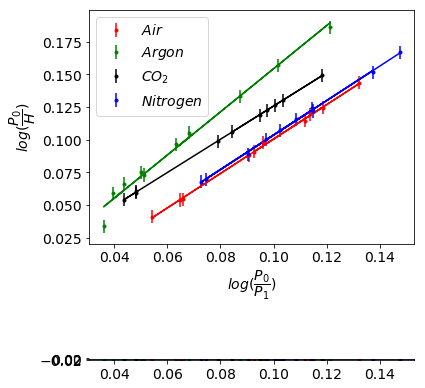

In [196]:
fig = plt.figure(1)
gridspec.GridSpec(4,4)

plt.subplot2grid((4,4), (0,0), colspan=4, rowspan=3)
plt.errorbar(x1,y1,err2,fmt= 'r.', label = '$Air$')
plt.errorbar(x2,y2,err2, fmt= 'g.', label = '$Argon$')
plt.errorbar(x3,y3,err2, fmt= 'k.', label = '$CO_2$')
plt.errorbar(x4,y4,err2,  fmt= 'b.', label = '$Nitrogen$')

plt.plot(x1,lin2(x1,m[0],b[0]), 'r-')
plt.plot(x2,lin2(x2,m[1],b[1]), 'g-')
plt.plot(x3,lin2(x3,m[2],b[2]), 'k-')
plt.plot(x4,lin2(x4,m[3],b[3]), 'b-')

plt.ylabel('$log(\dfrac{P_0}{H})$')
plt.xlabel('$log(\dfrac{P_0}{P_1})$')
plt.legend()

plt.subplot2grid((4,4), (3,0),colspan=4, rowspan=1)

plt.errorbar(x1,res1,err2,fmt= 'r.', label = '$Air$')
plt.errorbar(x2,res2,err2, fmt= 'g.', label = '$Argon$')
plt.errorbar(x3,res3,err2, fmt= 'k.', label = '$CO_2$')
plt.errorbar(x4,res4,err2,  fmt= 'b.', label = '$Nitrogen$')
plt.axhline(y=0)

fig.tight_layout()
fig.set_size_inches(w=6,h=6)

In [99]:
SH = pd.read_excel('../data/Specific_Heats.xlsx')


In [100]:
SH = SH.iloc[:,0:3]

In [118]:
air = SH.loc[SH['Gas'].isin(['air','Air'])]
air = air[air!=0]
air = air[air<2]
air = air.dropna()
spech = air.values[:,1:3]
air

,Gas,Mean,Uncertainty
3,Air,1.900000,0.200000
9,Air,1.390000,0.020000
21,Air,1.377000,0.002000
22,Air,1.080000,0.040000
27,Air,0.860000,0.040000
32,Air,1.290000,0.010000
40,Air,1.400000,0.060000
42,air,1.322000,0.005000
51,Air,1.370000,0.080000
59,Air,1.266000,0.006000


In [119]:
val = np.array(spech[:,0])
uncer = (np.array(spech[:,1]))**-2

In [120]:
mean = np.average(val, weights=uncer)
mean

1.3435248334314467

In [121]:
err = np.sum(uncer)
np.std(val)/(np.sqrt(len(val)))

0.04132537203662235

In [122]:
np.sqrt(1/err)

0.001144746011651742

In [22]:
osc = pd.read_excel('../data/ruchhardt.xlsx')
osc = osc.values
np.shape(osc)

(1001, 22)

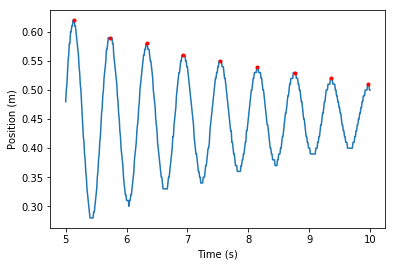

In [43]:
i = 0
n = 500
time1 = osc[n:,i]
run1 = osc[n:,i+1]

peaks, _ = find_peaks(run1)
plt.plot(time1,run1)
plt.plot(time1[peaks],run1[peaks],'r.')
plt.ylabel('Position (m)')
plt.xlabel('Time (s)')
plt.show()


In [44]:
peaks

array([ 13,  73, 133, 193, 254, 315, 376, 436, 497], dtype=int64)

In [46]:

t= (time1[497]-time1[0])/(len(peaks))
p = np.array([t])
t

0.5522222222222223

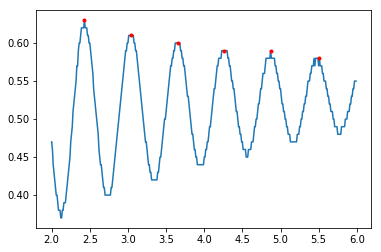

In [87]:
i = 20
n = 200
m = 600
time2 = osc[n:m,i]
run2 = osc[n:m,i+1]

peaks, _ = find_peaks(run2,distance=10)
plt.plot(time2,run2)
plt.plot(time2[peaks],run2[peaks],'r.')
plt.show()

In [88]:
T= [(time2[peaks[-1]]-time2[peaks[0]])/(len(peaks))]
T

[0.5133333333333333]

In [89]:

p = np.concatenate((p,T))
p

array([0.55222222, 0.5325    , 0.50666667, 0.53125   , 0.53      ,
       0.52142857, 0.5325    , 0.52625   , 0.5325    , 0.51333333])

In [90]:
T = np.mean(p)
dT = np.std(p)
uT = ufloat(T,dT)
uT

0.5278650793650794+/-0.011740165711339233

In [91]:
mass = ufloat(0.005612,0.000001)
diam = ufloat(1.647,0.002)
diam = diam*0.01
vol = ufloat(0.0092057,0.000008)
H = ufloat(102.3,1)
H = H*1000

In [92]:
Area = np.pi*(diam/2)**2
Area

0.00021304781266153896+/-5.17420310046239e-07

In [93]:
gamma = (4*(np.pi**2)*mass*vol)/(Area**2*H*(uT**2))
gamma

1.5763714434871998+/-0.07221356200822121

In [94]:
gamma

1.5763714434871998+/-0.07221356200822121